In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/content/archive (11).zip'
data = pd.read_csv(path)

In [3]:
data.head(20)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [4]:
data.dtypes

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print(missing_data[missing_data["Missing Values"] > 0])

                     Missing Values  Percentage
location                        346    1.935123
department                    11547   64.580537
salary_range                  15012   83.959732
company_profile                3308   18.501119
description                       1    0.005593
requirements                   2696   15.078300
benefits                       7212   40.335570
employment_type                3471   19.412752
required_experience            7050   39.429530
required_education             8105   45.329978
industry                       4903   27.421700
function                       6455   36.101790


In [7]:
numerical_columns = ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

categorical_columns = ['title', 'location', 'department', 'salary_range',
                       'company_profile', 'description', 'requirements',
                       'benefits', 'employment_type', 'required_experience',
                       'required_education', 'industry', 'function']

for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        if col in ['company_profile', 'description']:
            data[col].fillna("Not Provided", inplace=True)
        else:
            data[col].fillna("Unknown", inplace=True)

for col in categorical_columns:
    data[f"{col}_missing"] = data[col].isnull().astype(int)

print(data.isnull().sum())

job_id                         0
title                          0
location                       0
department                     0
salary_range                   0
company_profile                0
description                    0
requirements                   0
benefits                       0
telecommuting                  0
has_company_logo               0
has_questions                  0
employment_type                0
required_experience            0
required_education             0
industry                       0
function                       0
fraudulent                     0
title_missing                  0
location_missing               0
department_missing             0
salary_range_missing           0
company_profile_missing        0
description_missing            0
requirements_missing           0
benefits_missing               0
employment_type_missing        0
required_experience_missing    0
required_education_missing     0
industry_missing               0
function_m

In [8]:
for col in categorical_columns:
    missing_col = f"{col}_missing"
    if missing_col in data.columns:
        data.drop(columns=[missing_col], inplace=True)

print(data.columns)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [9]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
unique_counts = data.nunique()
print(unique_counts)

job_id                 17880
title                  11231
location                3106
department              1337
salary_range             875
company_profile         1710
description            14802
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
dtype: int64


In [11]:
binary_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

for col in binary_columns:
    data[col] = data[col].astype(int)

print(data.dtypes)

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


In [12]:
data['telecommuting'].unique()

array([0, 1])

In [13]:
 from sklearn.preprocessing import LabelEncoder

ordinal_cols = ['required_experience', 'required_education', 'salary_range']

label_encoder = LabelEncoder()
for col in ordinal_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))


In [14]:
nominal_cols = ['title', 'location', 'department', 'company_profile', 'description',
                'requirements', 'benefits', 'employment_type', 'industry', 'function']

data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)
print(data.head())

   job_id  salary_range  telecommuting  has_company_logo  has_questions  \
0       1           874              0                 1              0   
1       2           874              0                 1              0   
2       3           874              0                 1              0   
3       4           874              0                 1              0   
4       5           874              0                 1              1   

   required_experience  required_education  fraudulent  \
0                    4                   9           0   
1                    6                   9           0   
2                    7                   9           0   
3                    5                   1           0   
4                    5                   1           0   

   title_   Environmental Technician I  title_   Piping Material Engineer  \
0                                False                              False   
1                                False        

In [15]:
print(data.dtypes)

job_id                        int64
salary_range                  int64
telecommuting                 int64
has_company_logo              int64
has_questions                 int64
                              ...  
function_Strategy/Planning     bool
function_Supply Chain          bool
function_Training              bool
function_Unknown               bool
function_Writing/Editing       bool
Length: 50533, dtype: object


In [16]:
from sklearn.preprocessing import StandardScaler

# Select numerical features (excluding the target variable)
numerical_columns = ['telecommuting', 'has_company_logo', 'has_questions']  # All int64 features
scaler = StandardScaler()

# Apply standardization
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the standardized values
print(data.head())


   job_id  salary_range  telecommuting  has_company_logo  has_questions  \
0       1           874      -0.211707           0.50733      -0.983580   
1       2           874      -0.211707           0.50733      -0.983580   
2       3           874      -0.211707           0.50733      -0.983580   
3       4           874      -0.211707           0.50733      -0.983580   
4       5           874      -0.211707           0.50733       1.016694   

   required_experience  required_education  fraudulent  \
0                    4                   9           0   
1                    6                   9           0   
2                    7                   9           0   
3                    5                   1           0   
4                    5                   1           0   

   title_   Environmental Technician I  title_   Piping Material Engineer  \
0                                False                              False   
1                                False        

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data.drop(columns=['fraudulent'])
y = data['fraudulent']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9868568232662193
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3395
           1       1.00      0.74      0.85       181

    accuracy                           0.99      3576
   macro avg       0.99      0.87      0.92      3576
weighted avg       0.99      0.99      0.99      3576



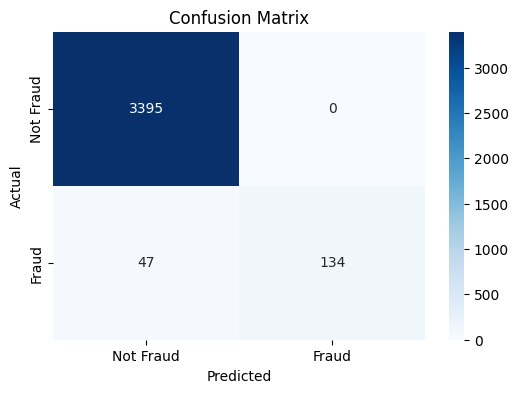

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3395
           1       1.00      0.74      0.85       181

    accuracy                           0.99      3576
   macro avg       0.99      0.87      0.92      3576
weighted avg       0.99      0.99      0.99      3576



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

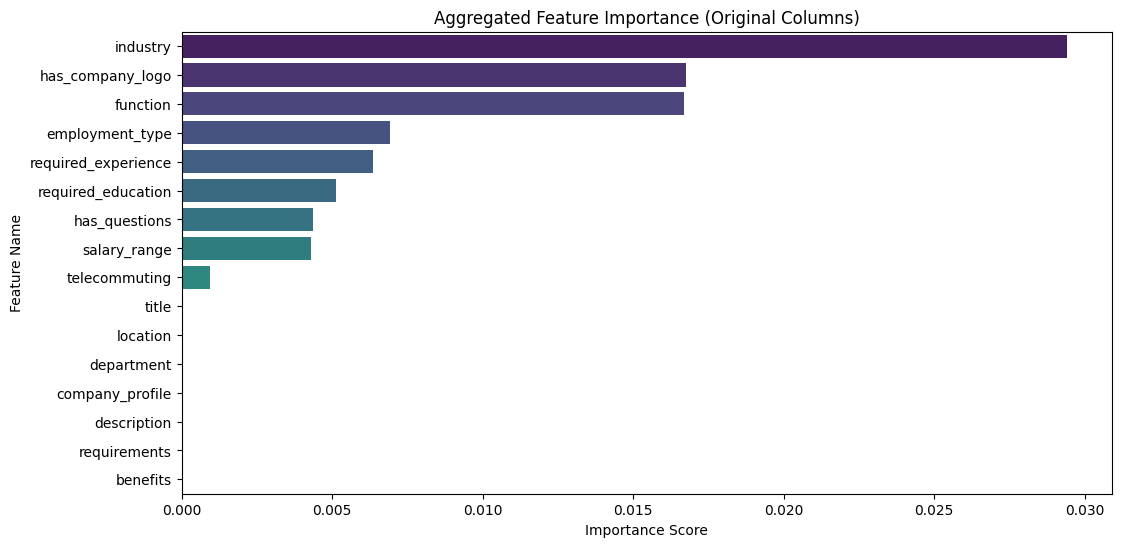

In [22]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Group feature importances by original column names before encoding
original_features = {
    'title': ['title'],
    'location': ['location'],
    'department': ['department'],
    'salary_range': ['salary_range'],
    'company_profile': ['company_profile'],
    'description': ['description'],
    'requirements': ['requirements'],
    'benefits': ['benefits'],
    'telecommuting': ['telecommuting'],
    'has_company_logo': ['has_company_logo'],
    'has_questions': ['has_questions'],
    'employment_type': [col for col in X_train.columns if col.startswith('employment_type')],
    'required_experience': [col for col in X_train.columns if col.startswith('required_experience')],
    'required_education': [col for col in X_train.columns if col.startswith('required_education')],
    'industry': [col for col in X_train.columns if col.startswith('industry')],
    'function': [col for col in X_train.columns if col.startswith('function')]
}

# Aggregate importance scores by summing them for one-hot encoded categories
aggregated_importances = {}
for orig_col, encoded_cols in original_features.items():
    aggregated_importances[orig_col] = feature_importances[feature_importances['Feature'].isin(encoded_cols)]['Importance'].sum()

# Convert to DataFrame for plotting
aggregated_importances_df = pd.DataFrame.from_dict(aggregated_importances, orient='index', columns=['Importance'])
aggregated_importances_df = aggregated_importances_df.sort_values(by='Importance', ascending=False)

# Plot aggregated feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=aggregated_importances_df['Importance'], y=aggregated_importances_df.index, palette='viridis')
plt.title('Aggregated Feature Importance (Original Columns)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()